In [1]:
from keras import models, layers
import numpy as np
from keras.datasets import imdb

In [2]:
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data()

In [3]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for index, sequence in enumerate(sequences):
        for s in sequence:
            if s < dimension:
                results[index, s] = 1
    return results

In [4]:
x_train = vectorize_sequence(train_reviews)
x_test = vectorize_sequence(test_reviews)

In [5]:

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')


In [6]:
x_train_training = x_train[:10000]
y_train_training = y_train[:10000]
x_train_validation = x_train[10000:]
y_train_validation = y_train[10000:]

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\PMLS\Desktop\Projects\data science\dl\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
modelHistory = model.fit(x_train_training, y_train_training, epochs=20, batch_size=512, validation_data=(x_train_validation,y_train_validation))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.6679 - loss: 0.6277 - val_accuracy: 0.8559 - val_loss: 0.4533
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8859 - loss: 0.3952 - val_accuracy: 0.8570 - val_loss: 0.3710
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9220 - loss: 0.2887 - val_accuracy: 0.8782 - val_loss: 0.3199
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9399 - loss: 0.2205 - val_accuracy: 0.8771 - val_loss: 0.3149
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9445 - loss: 0.1834 - val_accuracy: 0.8865 - val_loss: 0.2855
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9647 - loss: 0.1445 - val_accuracy: 0.8861 - val_loss: 0.2926
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9665 - loss: 0.1320 - val_accuracy: 0.8851 - val_loss: 0.2929
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9768 - loss: 0.1040 - val_accuracy: 0.8793 - 

In [10]:
loss = modelHistory.history['loss']
val_loss = modelHistory.history['val_loss']
accuracy = modelHistory.history['accuracy']
val_accuracy = modelHistory.history['val_accuracy']




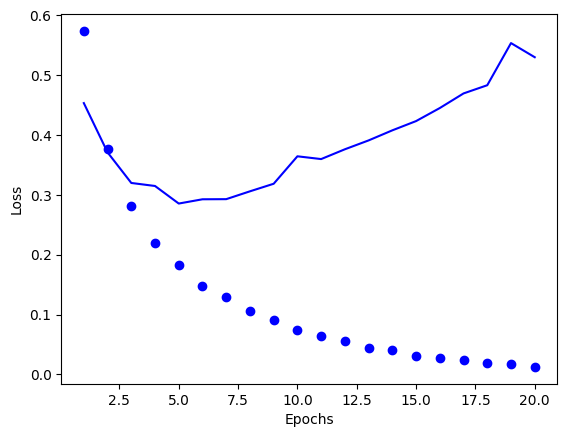

In [11]:

import matplotlib.pyplot as plt
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Train Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

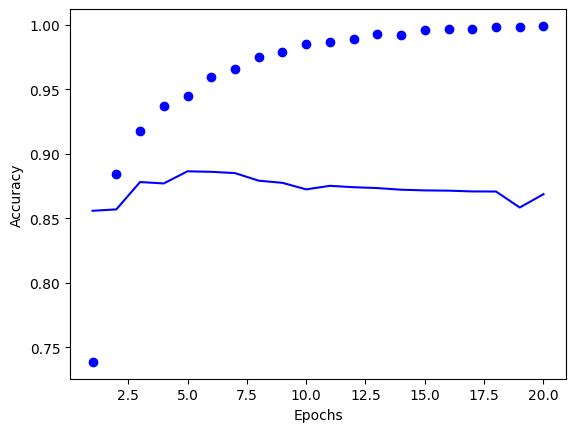

In [12]:
plt.plot(epochs, accuracy,'bo',label='Train Accuracy')
plt.plot(epochs, val_accuracy,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()